# MILP formulation for knapsack problem: 
## Guroby + Python
The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.

The most common problem being solved is the 0-1 knapsack problem, which restricts the number 𝑥_𝑖  of copies of each kind of item to zero or one. Given a set of n items numbered from 1 to n, each with a weight 𝑤_𝑖  and a value 𝑣_𝑖, along with a maximum weight capacity 𝑊.
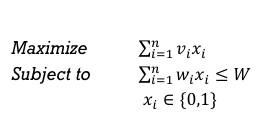

1. The first step is to load the data and/or construct an instance of the problem

In [ ]:
from random import seed
from random import randint
n_obj=15
cap=100.0
val =[]
wei =[]
for i in range(n_obj):
    val.append(randint(5,15))
    wei.append(randint(1, 100))
print(val)
print(wei)

2. The second step is to define variables, objective and constraints of the model

In [ ]:
import gurobipy as gp
from gurobipy import GRB

m = gp.Model("knapsack")

# x[i] will be the name of the variable in the formulation when you print the model or when you print the variables
# obj_var[i] is the name of the variable used internally by python to construct and manipulate the formulation
ind_objs = range(n_obj)
obj_var = m.addVars(ind_objs, vtype= GRB.BINARY, obj=val, name = "x")  

m.modelSense = GRB.MAXIMIZE
m.addConstr((gp.quicksum(wei[i]*obj_var[i] for i in ind_objs) <= cap), "cap")

# if one doesn't define the objective value coeficients when define a variable, then one must define the objective 
#funtion at this point 

3. Optionally, we can write the model to lp format if we want see the model in a more known written fashion 


In [ ]:
m.write('knapsack.lp')

4. We optimize the model

In [ ]:
m.optimize()

5. Print the values taken by the variables

In [ ]:
for v in m.getVars():
        print('%s %g' % (v.varName, v.x))

print('Obj: %g' % m.objVal)